In [1]:
import sklearn
import pandas as pd
import numpy as np

df = pd.read_csv('bonds.csv')
#df = df.drop(df.index[0])
df.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,Issued Amount,Maturity Type,Coupon Type,Industry,Months in JNK,Months in HYG,Months in Both,LIQ SCORE
0,00213MAL8,APXSEC,8/17/2016,12/1/2022,Nan,Nan,B-,Nan,NR,7.875,100000000,CALLABLE,EXCHANGED,Commercial Services,2,0,0,10.822582
1,576485AC0,MTDR,12/9/2016,4/15/2023,Nan,B3,NR,Nan,NR,6.875,175000000,CALLABLE,EXCHANGED,Oil Gas,4,0,0,11.392744
2,18683KAJ0,CLF,3/2/2016,9/30/2020,Nan,WR,NR,Nan,NR,8.000,218545000,CALLABLE,FIXED,Iron/Steel,0,1,0,12.567121
3,172441BA4,CNK,3/21/2016,6/1/2023,Nan,B2,BB,Nan,B+,4.875,225000000,CALLABLE,EXCHANGED,Entertainment,2,2,1,12.536384
4,184496AM9,CLH,3/17/2016,6/1/2021,Nan,Nan,BB+,Nan,NR,5.125,250000000,CALLABLE,EXCHANGED,Environmental Control,3,0,0,11.572853


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 18 columns):
CUSIP                         1325 non-null object
Ticker                        1325 non-null object
Issue Date                    1325 non-null object
Maturity                      1325 non-null object
1st Call Date                 1325 non-null object
Moodys                        1325 non-null object
S_and_P                       1325 non-null object
Fitch                         1325 non-null object
Bloomberg Composite Rating    1325 non-null object
Coupon                        1325 non-null float64
Issued Amount                 1325 non-null int64
Maturity Type                 1325 non-null object
Coupon Type                   1325 non-null object
Industry                      1325 non-null object
Months in JNK                 1325 non-null int64
Months in HYG                 1325 non-null int64
Months in Both                1325 non-null int64
LIQ SCORE                    

# Histogram 

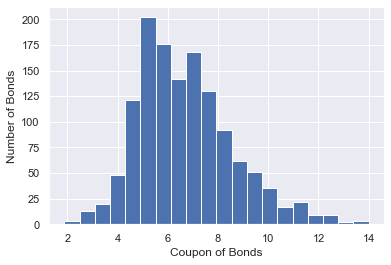

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_= plt.hist(df["Coupon"], bins=20)
_= plt.xlabel('Coupon of Bonds')
_= plt.ylabel('Number of Bonds')
plt.show()

# Q-Q Plot

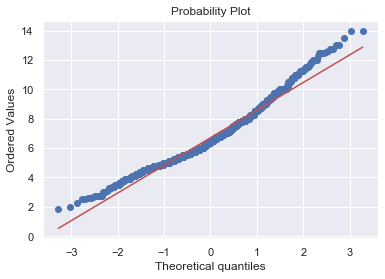

In [4]:

from scipy import stats
stats.probplot(df.Coupon, dist="norm", plot=plt)
plt.show()

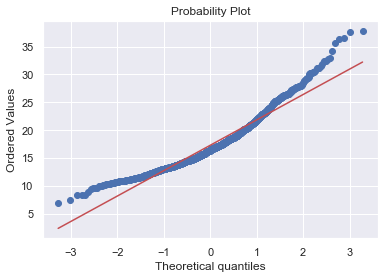

In [5]:
stats.probplot(df["LIQ SCORE"], dist="norm", plot=plt)
plt.show()

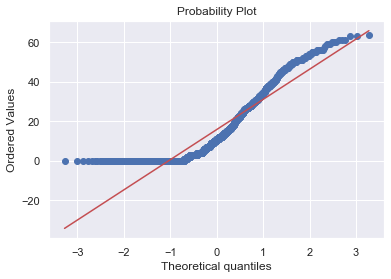

In [6]:
stats.probplot(df["Months in JNK"], dist="norm", plot=plt)
plt.show()

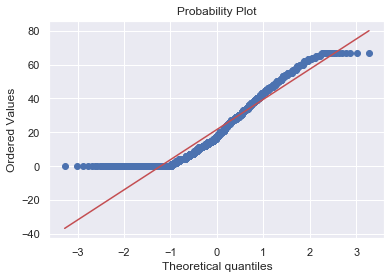

In [7]:
stats.probplot(df["Months in HYG"], dist="norm", plot=plt)
plt.show()

# swarm plot

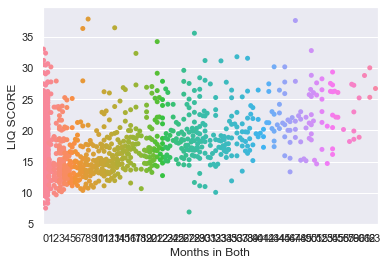

In [8]:

_= sns.swarmplot('Months in Both','LIQ SCORE',data=df)
plt.show()

# Parallel Coordinates Plots

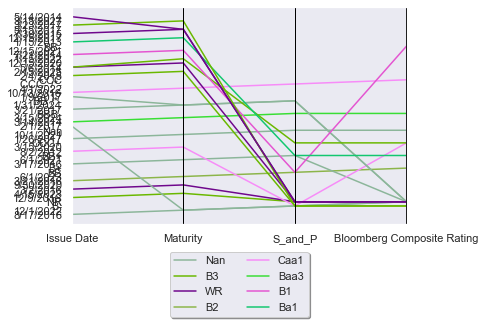

In [9]:

from pandas.plotting import parallel_coordinates
features = df[['Issue Date', 'Maturity', 'S_and_P', 'Moodys', 'Bloomberg Composite Rating']][:20]

parallel_coordinates(features, 'Moodys')
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.1),ncol=2,fancybox=True,shadow=True)
plt.show()

# Cross-plot 

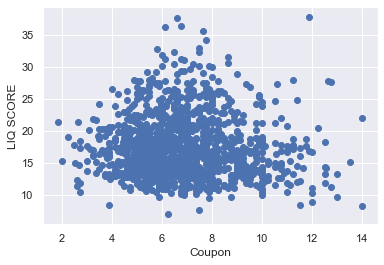

In [10]:

plt.scatter(df["Coupon"], df["LIQ SCORE"])
plt.xlabel('Coupon')
plt.ylabel('LIQ SCORE')
plt.show()

# Correlations

In [11]:
correlations = pd.DataFrame(df.corr())
correlations

,Coupon,Issued Amount,Months in JNK,Months in HYG,Months in Both,LIQ SCORE
Coupon,1.000000,0.092535,0.002079,-0.022577,-0.049530,-0.010168
Issued Amount,0.092535,1.000000,0.152341,0.068130,0.225144,0.275242
Months in JNK,0.002079,0.152341,1.000000,0.373561,0.833771,0.344964
Months in HYG,-0.022577,0.068130,0.373561,1.000000,0.622751,0.611710
Months in Both,-0.049530,0.225144,0.833771,0.622751,1.000000,0.403761
LIQ SCORE,-0.010168,0.275242,0.344964,0.611710,0.403761,1.000000


# HEAT MAP

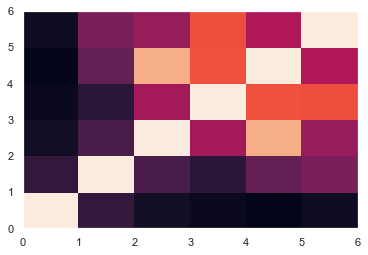

In [12]:
plt.pcolor(correlations)
plt.show()

# ECDF

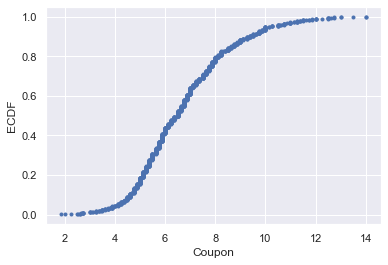

In [13]:

x = np.sort(df["Coupon"])
y = np.arange(1, len(x)+1) / len(x) 
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("Coupon")
plt.ylabel("ECDF")
plt.show()
    


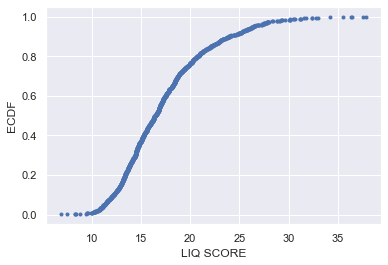

In [14]:
x = np.sort(df["LIQ SCORE"])
y = np.arange(1, len(x)+1) / len(x) 
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("LIQ SCORE")
plt.ylabel("ECDF")
plt.show()

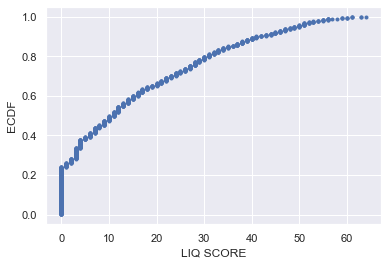

In [15]:
x = np.sort(df["Months in JNK"])
y = np.arange(1, len(x)+1) / len(x) 
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("LIQ SCORE")
plt.ylabel("ECDF")
plt.show()

# BOX PLOT

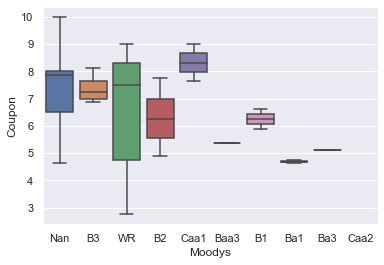

In [16]:
sns.set()
sns.boxplot(df["Moodys"][:40], df["Coupon"][:30], data=df)
plt.show()